In [4]:
!pip install face_recognition opencv-python matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566166 sha256=43d214af6b472e23b5d9bea0078c7500adf174759557eb5d4f1e8b03308b4c6b
  Stored in directory: /root/.cache/pip/wheels/8f/47/c8/f44c5aebb7507f7c8a2c0bd23151d732d0f0bd6884ad4ac635
Successfully built face-recognition-models


**Face Recognition Using face_recognition and OpenCV**

In [5]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
import numpy as np
import cv2
import base64

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
          const div = document.createElement('div');
          const capture = document.createElement('button');
          capture.textContent = 'Capture';
          div.appendChild(capture);

          const video = document.createElement('video');
          video.style.display = 'block';

          const stream = await navigator.mediaDevices.getUserMedia({video: true});
          document.body.appendChild(div);
          div.appendChild(video);
          video.srcObject = stream;
          await video.play();

          await new Promise((resolve) => capture.onclick = resolve);

          const canvas = document.createElement('canvas');
          canvas.width = video.videoWidth;
          canvas.height = video.videoHeight;
          canvas.getContext('2d').drawImage(video, 0, 0);

          stream.getVideoTracks()[0].stop();
          div.remove();

          return canvas.toDataURL('image/jpeg', quality);
        }
    ''')

    display(js)
    data = eval_js(f'takePhoto({quality})')

    image_bytes = base64.b64decode(data.split(',')[1])
    np_arr = np.frombuffer(image_bytes, np.uint8)
    img = cv2.imdecode(np_arr, cv2.IMREAD_COLOR)

    cv2.imwrite(filename, img)
    return img


In [7]:
import face_recognition

print("Capture KNOWN face")
known_frame = take_photo('known.jpg')

known_image = face_recognition.load_image_file('known.jpg')
known_encoding = face_recognition.face_encodings(
    known_image,
    num_jitters=50,
    model='large'
)[0]


Capture KNOWN face


<IPython.core.display.Javascript object>

In [15]:
print("Capture TEST face")
test_frame = take_photo('test.jpg')


Capture TEST face


<IPython.core.display.Javascript object>

Unrecognized


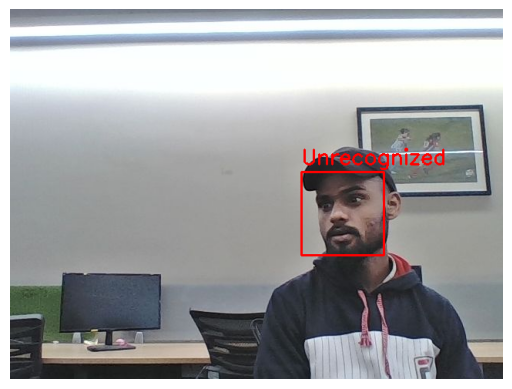

In [16]:
import matplotlib.pyplot as plt

face_locations = face_recognition.face_locations(test_frame)
face_encodings = face_recognition.face_encodings(
    test_frame,
    face_locations,
    num_jitters=23,
    model='large'
)

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    match = face_recognition.compare_faces([known_encoding], face_encoding)[0]

    label = "Recognized" if match else "Unrecognized"
    color = (0, 255, 0) if match else (0, 0, 255)

    cv2.rectangle(test_frame, (left, top), (right, bottom), color, 2)
    cv2.putText(test_frame, label, (left, top - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    print("Enter..." if match else "Unrecognized")

plt.imshow(cv2.cvtColor(test_frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
